# Regresja liniowa

## Zadanie 1
Proszę dokonać aproksymacji liniowej na podstawie punktów: (1, 8) oraz (3,12).

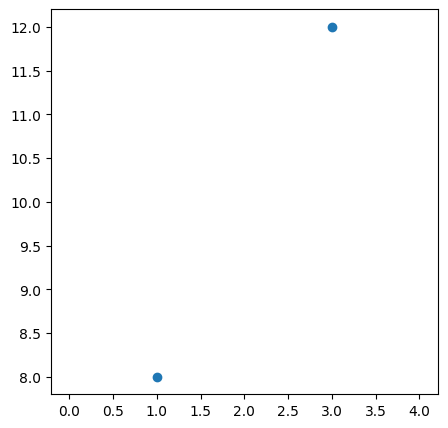

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter([1,3], [8,12])
plt.axis('equal')
plt.show()

In [ ]:
import numpy as np
coefs = np.array([[1, 1], [3, 1]])
y_value = np.array([[8], [12]])

# Xa = Y
# a = (X**(-1))*Y

In [ ]:
coefs

array([[1, 1],
       [3, 1]])

In [ ]:
np.linalg.inv(coefs) @ y_value

array([[2.],
       [6.]])

In [ ]:
# y = 2x + 6

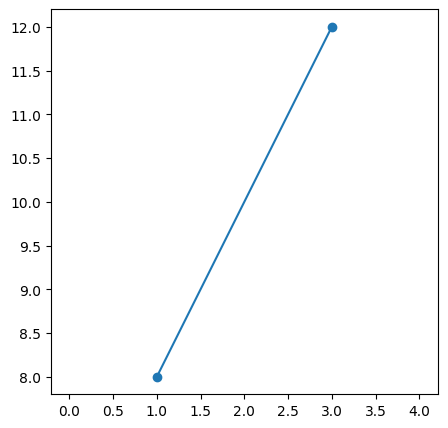

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter([1,3], [8,12])
plt.plot(np.linspace(1,3,100), 2*np.linspace(1,3,100)+6)
plt.axis('equal')
plt.show()

## Zadanie 2.
Proszę dokonoać aproksymacji kwadratowej na podstawie punktów: (1,8), (2,9) oraz (3,12).

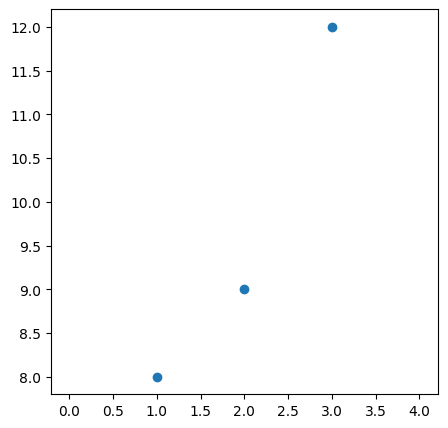

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter([1,2,3], [8, 9, 12])
plt.axis('equal')
plt.show()

In [ ]:
coefs = np.array([[1, 1, 1], [4, 2, 1], [9, 3, 1]])
y_value = np.array([[8], [9], [12]])

# Xa = Y
# a = (X**(-1))*Y

In [ ]:
coefs

array([[1, 1, 1],
       [4, 2, 1],
       [9, 3, 1]])

In [ ]:
np.linalg.inv(coefs) @ y_value

array([[ 1.],
       [-2.],
       [ 9.]])

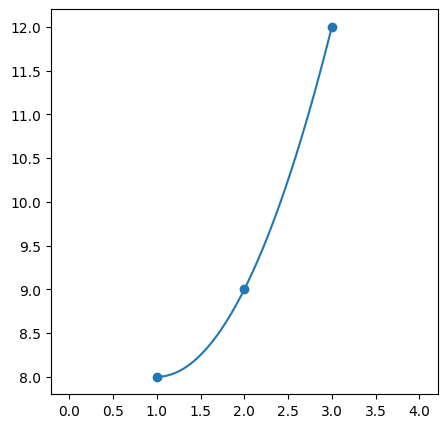

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter([1,2,3], [8, 9, 12])
x = np.linspace(1,3,100)
plt.plot(x, x**2-2*x+9)
plt.axis('equal')
plt.show()

## Zadanie 3.
Proszę dokonoać aproksymacji liniowej na podstawie punktów: (1,8), (2,9) oraz (3,12).

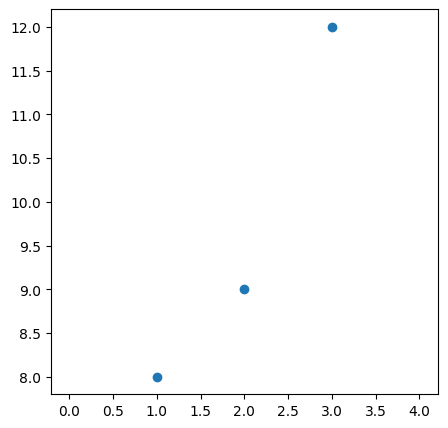

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter([1,2,3], [8, 9, 12])
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
X = [[1],[2],[3]]
y = [8,9,12]
model = LinearRegression()
model.fit(X,y)
a,b = model.coef_[0], model.intercept_

a,b

(np.float64(1.9999999999999991), np.float64(5.666666666666668))

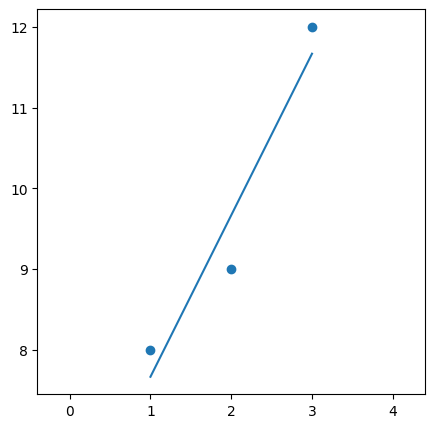

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter([1,2,3], [8, 9, 12])
x = np.linspace(1,3,100)
plt.plot(x, a*x+b)
plt.axis('equal')
plt.show()

## Zadanie 4.
Proszę wygenerować chumrę skorelowanych punktów i dopasować do nich model regresji liniowej.

Proszę przyjąć zależność liniową $y = \frac{1}{2}x + 6$.

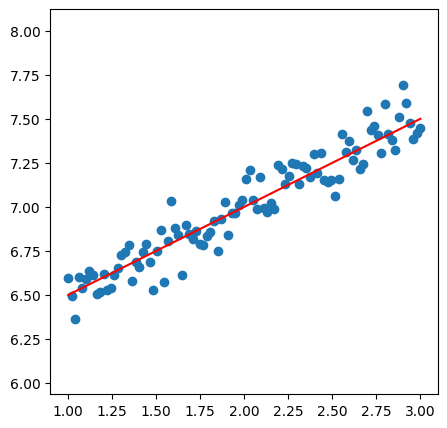

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,3,100)
y = 0.5*x + 6
y_rand = y + np.random.normal(0, 0.1, len(y))

plt.figure(figsize=(5,5))
plt.scatter(x, y_rand)
plt.plot(x,y, color = 'red')
plt.axis('equal')
plt.show()

In [ ]:
np.corrcoef(x,y_rand)[0,1]

np.float64(0.9525469621528896)

In [ ]:
X = x.reshape(-1, 1)
y = y_rand
model = LinearRegression()
model.fit(X,y)
a,b = model.coef_[0], model.intercept_

a,b

(np.float64(0.5137396726110163), np.float64(5.975991269702103))

## Zadanie 5.
Proszę analitycznie obliczyć współczynniki funkcji liniowej z poprzedniego zadania.

In [ ]:
a = (np.mean(y_rand*x) - np.mean(y_rand)*np.mean(x))/(np.mean(x**2) - np.mean(x)**2)
b = np.mean(y_rand) - a * np.mean(x)

a, b

(np.float64(0.5137396726110214), np.float64(5.975991269702093))

## Zadanie 6.
Proszę zaimplementować algorytm minimalizacji gradientu.

In [ ]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

def loss_function(data_matrix, a, b):
    return np.mean((data_matrix[:,1] - a*data_matrix[:,0] - b)**2)

def gradient(data_matrix, a, b):
    d_a = -2*np.mean(data_matrix[:,0]*(data_matrix[:,1] - a*data_matrix[:,0] - b))
    d_b = -2*np.mean((data_matrix[:,1] - a*data_matrix[:,0] - b))
    return d_a, d_b

def fit_model(data_matrix,
              learning_rate = 0.001,
              iterations = 10,
              a = 0,
              b = 0):

    for i in range(iterations):
        gradients = gradient(data_matrix, a, b)
        a = a - learning_rate * gradients[0]
        b = b - learning_rate * gradients[1]

    return a, b

In [ ]:
dataset = np.column_stack((x, y_rand))

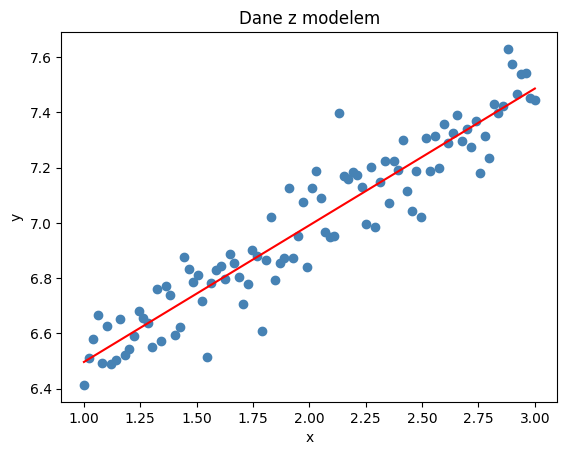

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(6.4, 4.8))

model2 = fit_model(dataset, learning_rate = 0.01, iterations = 10000)

axes.scatter(dataset[:,0], dataset[:,1], label="Dane z błędem losowym", color='steelblue')
axes.plot(dataset[:,0], model2[0]*dataset[:,0] + model2[1], label="model", color='red')
axes.set_title(r"Dane z modelem")
axes.set_xlabel("x")
axes.set_ylabel("y")

plt.show()

## Animacja

In [ ]:
# @title Tworzenie animacjji wizualizującej proces uczenia
import matplotlib.animation as animation

# Tworzenie figury i osi (bez wyświetlania)
fig, axes = plt.subplots(1, 1, figsize=(6.4, 4.8))

# Parametry modelu
h = 10
lr = 0.05
iters = 1000

# Inicjalizacja pustych DataFrame
recon = pd.DataFrame({'X': [], 'Y': []})

# Kolory
colors_red_theme = ['darkorange', 'red', 'crimson']

# Wykresy punktowe (dane)
scatter = axes.scatter(dataset[:, 0], dataset[:, 1], label="Dane", color='steelblue')

# Linie dla modeli
line_recon, = axes.plot(dataset[:, 0], len(dataset[:, 0])*[8], color=colors_red_theme[1], label="model (punktowy)")

# Ustawienia wykresów
axes.set_title("Uczenie modelu")
axes.set_ylabel("y")
axes.set_xticklabels([])

all_iters = iters

# Pasek postępu
progress_bar = tqdm(total=all_iters, desc="Tworzenie animacji")

new_a = [0]
new_b = [8]

# Funkcja aktualizująca animację
def update(i):
    global recon, all_iters, new_a, new_b

    if i >= all_iters:
        return

    # Model 1 (idealne dane)
    if i > 100:
      model = fit_model(dataset, learning_rate=lr, iterations=1, a = new_a[-1], b = new_b[-1])
    else:
      model = new_a[-1], new_b[-1]
    new_a.append(model[0])
    new_b.append(model[1])

    # Aktualizacja linii dla modelu

    line_recon.set_data(dataset[:, 0], new_a[-1]*dataset[:, 0] + new_b[-1])


    # Aktualizacja paska postępu
    progress_bar.update(1)

    return line_recon, new_a, new_b

# Tworzenie animacji (bez wyświetlania, z paskiem postępu)
ani = animation.FuncAnimation(fig, update, frames=all_iters, interval=25, blit=False)

# Zapis do pliku GIF
ani.save("animacja.gif", writer=animation.PillowWriter(fps=40))

# Zamknięcie paska postępu
progress_bar.close()

# Zamknięcie figury, aby nie była wyświetlana
plt.close(fig)


Tworzenie animacji:   0%|          | 0/1000 [00:00<?, ?it/s]

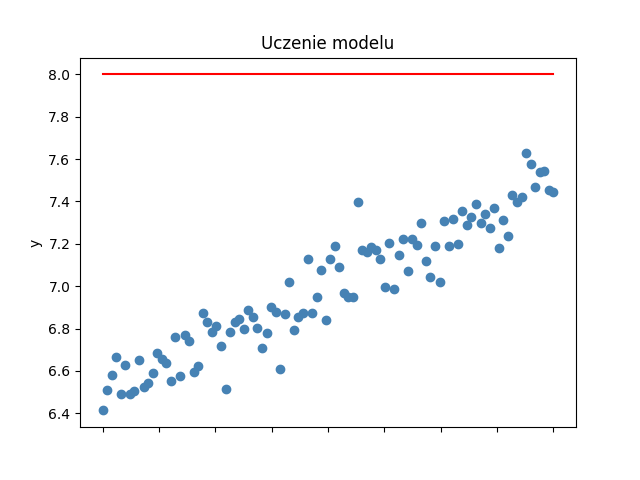

In [ ]:
# @title Animacja wizualizująca proces uczenia
from IPython.display import display, Image
display(Image(filename="animacja.gif"))

## Propozycja projektu
Proszę zaprezentować mechanizm działania uczenia maszynowego na pewnej wybranej funkcji analitycznej. Projekt powienien spełniać następujące wymagania:
1. Wybrana funkcja nie może być funkcją liniową;
2. Należy zaprezentować trzy metody dopasowania funkcji (o ile to możliwe): (1) za pomocą API scikit-learn, (2) za pomocą wzoru analitycznego, (3) za pomocą algorytmu gradientowego;
3. Jeżeli zaprezentowanie trzech sposobów z poprzedniego punktu jest niemożliwe, należy wyjaśnić dlaczego;
4. Nie należy prezentować całego wyprowadzenia wzorów, ale należy być przygotowanym na pytania jak takie wyprowadzenie przebiega;
5. Animacje nie są konieczne, ale należy zwizualizować każde dopasowanie za pomocą wykresów statycznych;
6. Projekt warto wykonać w Pythonie w Jupyter Notebook lub Google Colab, ale można wykorzystać inne IDE lub inny język programowania zgodnie z preferencjami.